# Results 
This notebook contains plots for the testing results and comparisons for Cholesky decomposition algorithms. 


In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [227]:
def read_data(filename):
    matrix_sizes = []
    results = [] 
    with open(filename, 'r') as f: 
        for line in f: 
            data = line.split()
            matrix_sizes.append(int(data[0]))
            results.append(float(data[1]))
    f.close() 
    return matrix_sizes, results

# Runtimes

In [259]:
# Read in data for runtimes 
sizes1, chol1_results = read_data('cholesky_times.txt')
sizes2, pivchol_results = read_data('pivoted_cholesky_times.txt')
sizes3, arma_results = read_data('armachol_times.txt')
sizes4, LU_results = read_data('LU_times.txt')
sizes5, LU_pivot_results = read_data('LU_pivot_times.txt')
sizes6, pivchol_sing_results = read_data('pivoted_cholesky_times_sing.txt')
sizes7, full_pivot_results = read_data('full_pivoted_cholesky_times.txt')
sizes8, full_pivot_sing_results = read_data('full_pivoted_cholesky_sing_times.txt')


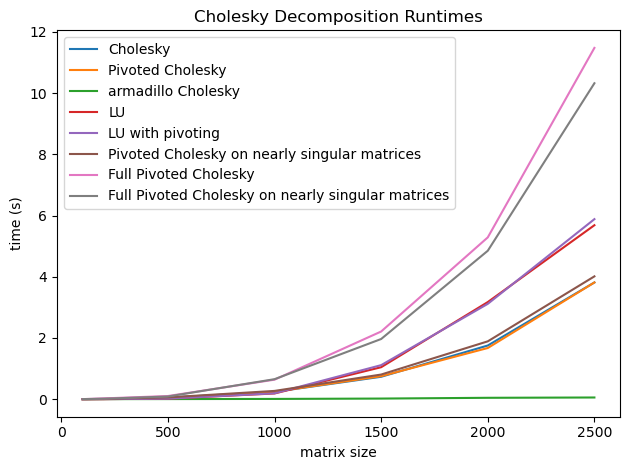

In [262]:
# Try on log scale
sizes1 == sizes2
n_vals = np.arange(sizes1[0], sizes1[-1])
On3 = n_vals**3
plt.plot(sizes1, chol1_results, label='Cholesky')
plt.plot(sizes2, pivchol_results, label='Pivoted Cholesky')
plt.plot(sizes3, arma_results, label='armadillo Cholesky')
plt.plot(sizes4,  LU_results, label='LU')
plt.plot(sizes5,  LU_pivot_results, label='LU with pivoting')
plt.plot(sizes6,  pivchol_sing_results, label='Pivoted Cholesky on nearly singular matrices')
plt.plot(sizes7, full_pivot_results, label='Full Pivoted Cholesky')
plt.plot(sizes8, full_pivot_sing_results, label='Full Pivoted Cholesky on nearly singular matrices')
# plt.plot(n_vals, On3,label='O(n^3)',linestyle='--' )
plt.xlabel('matrix size')
plt.ylabel('time (s)')
plt.title('Cholesky Decomposition Runtimes')
plt.legend()
plt.tight_layout()
# plt.xlim(500,2500)
plt.show(); 


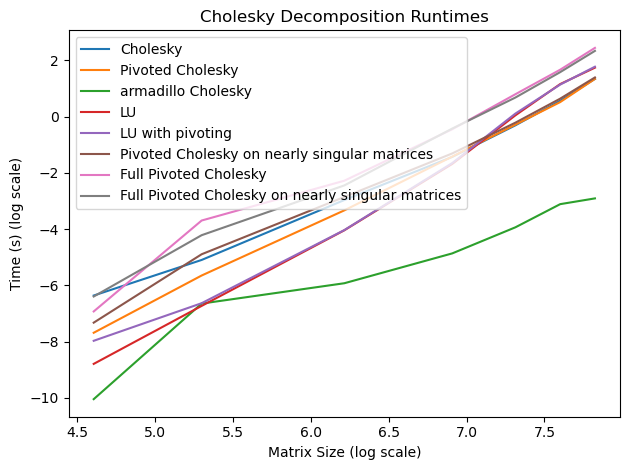

In [263]:
sizes1 == sizes2
# Log version of runtimes 
plt.plot(np.log(sizes1), np.log(chol1_results), label='Cholesky')
plt.plot(np.log(sizes1), np.log(pivchol_results), label='Pivoted Cholesky')
plt.plot(np.log(sizes1), np.log(arma_results), label='armadillo Cholesky')
plt.plot(np.log(sizes1), np.log(LU_results), label='LU')
plt.plot(np.log(sizes1), np.log(LU_pivot_results), label='LU with pivoting')
plt.plot(np.log(sizes1), np.log(pivchol_sing_results), label='Pivoted Cholesky on nearly singular matrices')
plt.plot(np.log(sizes1), np.log(full_pivot_results), label='Full Pivoted Cholesky')
plt.plot(np.log(sizes1), np.log(full_pivot_sing_results), label='Full Pivoted Cholesky on nearly singular matrices')
# plt.plot(np.log(n_vals), np.log(On3),label='O(n^3)',linestyle='--' )
plt.xlabel('Matrix Size (log scale)')
plt.ylabel('Time (s) (log scale)')
plt.title('Cholesky Decomposition Runtimes')
plt.legend(loc='upper left')

# plt.xlim(4.7,7.5)
plt.tight_layout()

plt.show(); 


# Matrix Reconstruction Error

In [264]:
# error plots for matrix reconstruction
sizes1, chol1_err= read_data('cholesky_error.txt')
sizes2, pivchol_err = read_data('pivoted_cholesky_error.txt')
sizes3, arma_err = read_data('arma_error.txt')
sizes4, LU_decomp_err = read_data('LU_decomp_error.txt')
sizes5, LU_pivot_decomp_err = read_data('LU_pivot_decomp_error.txt')

sizes6, pivchol_err_sing = read_data('pivoted_cholesky_err_sing.txt')
sizes7, fullpivchol_err = read_data('full_piv_cholesky_error.txt')

sizes8, full_piv_err_sing = read_data('full_pivoted_cholesky_err_sing.txt')


True


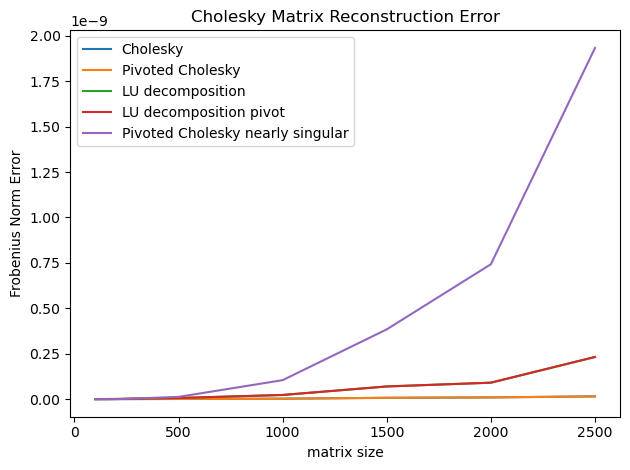

In [281]:
# Matrix reconstructino error
print(sizes1 == sizes2)
plt.plot(sizes1,chol1_err, label='Cholesky')
plt.plot(sizes2, pivchol_err, label='Pivoted Cholesky')
# plt.plot(sizes3, arma_err, label='armadillo Cholesky')
plt.plot(sizes4, LU_decomp_err, label='LU decomposition')
plt.plot(sizes5, LU_pivot_decomp_err, label='LU decomposition pivot')
plt.plot(sizes6, pivchol_err_sing , label='Pivoted Cholesky nearly singular')
# plt.plot(sizes7, fullpivchol_err , label='Full Pivoted Cholesky')
# plt.plot(sizes8, full_piv_err_sing , label='Full Pivoted Cholesky nearly singular')
# plt.xlim(250,2500)
plt.xlabel('matrix size')
plt.ylabel('Frobenius Norm Error')
plt.title('Cholesky Matrix Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show(); 


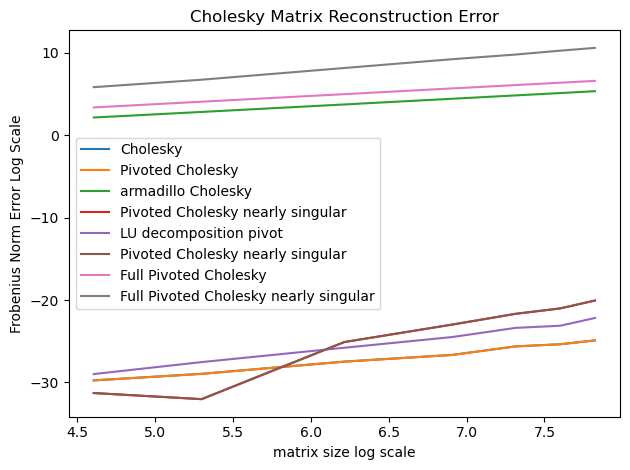

In [282]:
# log version of Matrix reconsruction error
plt.plot(np.log(sizes1), np.log(chol1_err), label='Cholesky')
plt.plot(np.log(sizes2), np.log(pivchol_err), label='Pivoted Cholesky')
plt.plot(np.log(sizes3), np.log(arma_err), label='armadillo Cholesky')
plt.plot(np.log(sizes4), np.log(pivchol_err_sing) , label='Pivoted Cholesky nearly singular')
plt.plot(np.log(sizes5), np.log(LU_pivot_decomp_err), label='LU decomposition pivot')
plt.plot(np.log(sizes6), np.log(pivchol_err_sing) , label='Pivoted Cholesky nearly singular')
plt.plot(np.log(sizes7), np.log(fullpivchol_err) , label='Full Pivoted Cholesky')
plt.plot(np.log(sizes8), np.log(full_piv_err_sing) , label='Full Pivoted Cholesky nearly singular')
plt.xlabel('matrix size log scale')
# plt.xlim(5.25,7.75)
# plt.ylim(-40,40)
plt.ylabel('Frobenius Norm Error Log Scale')
plt.title('Cholesky Matrix Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show(); 

# Inverse Matrix

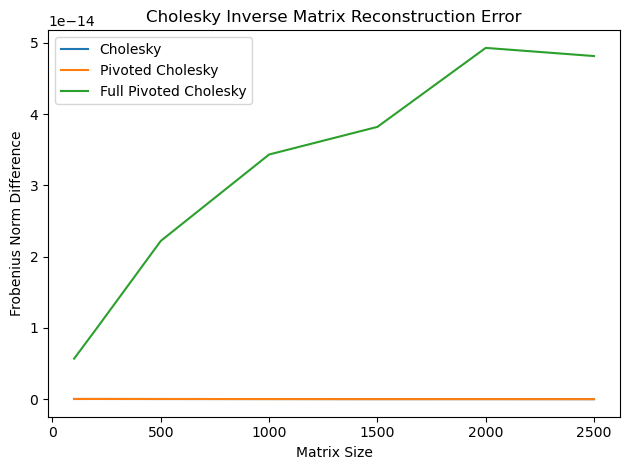

In [283]:
# error plots for inverse matrix solve
sizes1,  chol1_errinv= read_data('cholesky_inv_err.txt')
sizes2, pivchol_errinv= read_data('piv_cholesky_inv_err.txt')
sizes8, fullpivchol_errinv = read_data('full_piv_cholesky_inv_err.txt')
plt.plot(sizes1, chol1_errinv, label='Cholesky')
plt.plot(sizes1,  pivchol_errinv, label='Pivoted Cholesky')
plt.plot(sizes3,  fullpivchol_errinv, label='Full Pivoted Cholesky')

# plt.plot(np.log(sizes1), np.log(arma_err), label='armadillo Cholesky')
plt.xlabel('Matrix Size')
plt.ylabel('Frobenius Norm Difference')
plt.title('Cholesky Inverse Matrix Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show(); 

# Solve linear equations

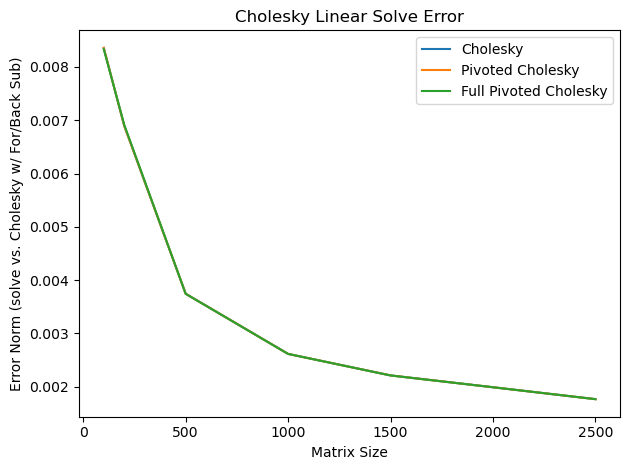

In [284]:
# error plots for linear solve
sizes1, chol_lin_err= read_data('cholesky_Axb_err.txt')
sizes2, pivchol_lin_err= read_data('cholesky_piv_Axb_err.txt')
sizes9,fullpivchol_lin_err= read_data('cholesky_full_piv_Axb_err.txt')
plt.plot(sizes1, chol_lin_err, label='Cholesky')
plt.plot(sizes1,  pivchol_lin_err, label='Pivoted Cholesky')
plt.plot(sizes1,  fullpivchol_lin_err, label='Full Pivoted Cholesky')
plt.plot()
plt.xlabel('Matrix Size')
plt.ylabel('Error Norm (solve vs. Cholesky w/ For/Back Sub)')
plt.title('Cholesky Linear Solve Error')
plt.legend()
plt.tight_layout()
plt.show(); 